Tujuan clustering ini adalah untuk mengelompokkan komoditas pangan berdasarkan karakteristik ketersediaan, kebutuhan, dan tingkat surplus/defisit selama periode 2019–2023, sehingga dapat diidentifikasi komoditas yang tergolong aman, seimbang, maupun rawan pangan.

In [1]:
# import pustaka yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('D:/My/Data Analyst/Pangan_jateng_analysis/data/processed/pangan_jateng_2019_2023.csv')

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun_data        476 non-null    int64 
 1   komoditas_pangan  476 non-null    object
 2   bulan_data        476 non-null    object
 3   ketersdiaan_data  476 non-null    int64 
 4   kebutuhan_data    476 non-null    int64 
 5   deviasi_data      476 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 22.4+ KB


,tahun_data,komoditas_pangan,bulan_data,ketersdiaan_data,kebutuhan_data,deviasi_data
0,2019,Padi,Desember,5736886,3197547,2539339
1,2019,Jagung,Desember,3467314,31246,3436068
2,2019,Kedelai,Desember,64334,340238,-275904
3,2019,K. Tanah,Desember,74605,3472,71133
4,2019,K. Hijau,Desember,99989,17359,82630


In [3]:
# rename kolom untuk memudahkan analisis
df = df.rename(columns={
    'tahun_data': 'tahun',
    'bulan_data': 'bulan',
    'komoditas_pangan': 'komoditas',
    'ketersdiaan_data': 'ketersediaan',
    'kebutuhan_data': 'kebutuhan',
    'deviasi_data': 'deviasi'
})


In [4]:
# membersihkan data pada kolom komoditas
df['komoditas'] = (
    df['komoditas']
    .astype(str)
    .str.strip()
    .str.lower()
)
# mapping nama komoditas yang serupa menjadi satu nama standar
komoditas_map = {
    # GULA
    'gula': 'gula',
    'gula pasir': 'gula',
    'gula konsumsi': 'gula',

    # CABAI RAWIT
    'cabai rawit': 'cabai rawit',
    'cabe rawit': 'cabai rawit',

    # CABAI BESAR
    'cabai besar': 'cabai besar',
    'cabe besar': 'cabai besar',
    'cabai merah': 'cabai besar',

    # DAGING
    'daging sapi': 'daging sapi',
    'daging sapi / kerbau': 'daging sapi',
    'daging total': 'daging sapi',
    'daging' : 'daging sapi',
    

}

df['komoditas'] = df['komoditas'].replace(komoditas_map)
df['komoditas'].value_counts()

komoditas
daging sapi      50
cabai rawit      38
kedelai          38
gula             38
telur            38
jagung           38
bawang merah     38
cabai besar      38
minyak goreng    36
daging ayam      36
bawang putih     36
beras            36
garam             2
padi              2
ikan              2
ubi jalar         2
ubi kayu          2
k. hijau          2
k. tanah          2
susu              2
Name: count, dtype: int64

In [5]:
# menambahkan kolom surplus_defisit dan rasio_pangan
df['surplus_defisit'] = df['ketersediaan'] - df['kebutuhan']
df['rasio_pangan'] = df['ketersediaan'] / df['kebutuhan']


In [6]:
# membuat dataframe untuk clustering
cluster_df = df.groupby('komoditas').agg({
    'ketersediaan': 'mean',
    'kebutuhan': 'mean',
    'surplus_defisit': 'mean',
    'rasio_pangan': 'mean'
}).reset_index()

cluster_df

,komoditas,ketersediaan,kebutuhan,surplus_defisit,rasio_pangan
0,bawang merah,5.061747e+04,1.659595e+04,3.402153e+04,3.495142
1,bawang putih,-1.051514e+04,8.254000e+03,-1.876914e+04,-1.079182
2,beras,1.051310e+06,3.426591e+05,7.086506e+05,3.092889
3,cabai besar,3.167374e+04,1.298474e+04,1.868900e+04,2.128866
4,cabai rawit,3.409371e+04,1.590113e+04,1.819258e+04,1.615729
5,daging ayam,1.196405e+05,3.129700e+04,8.834353e+04,5.115594
6,daging sapi,5.691174e+04,3.742100e+04,1.949074e+04,5.505782
7,garam,7.197385e+05,2.433950e+05,4.763435e+05,9.944165
8,gula,6.358721e+04,3.651439e+04,2.707282e+04,2.465575
9,ikan,5.845975e+05,2.446025e+05,3.399950e+05,2.538476


In [7]:
# memilih fitur untuk clustering
X = cluster_df[['ketersediaan', 'kebutuhan', 'surplus_defisit', 'rasio_pangan']]


In [8]:
# standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


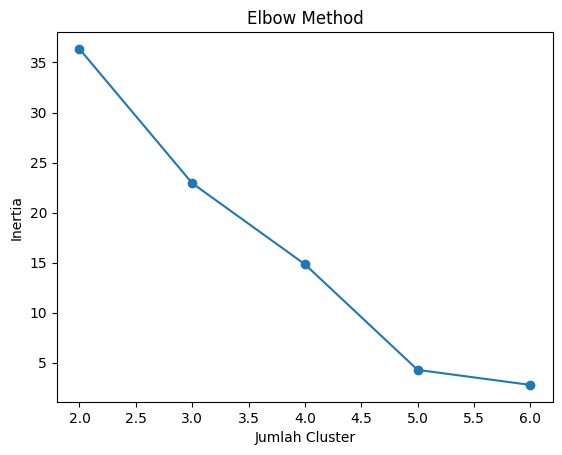

In [9]:
# menentukan jumlah cluster menggunakan metode elbow
inertia = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 7), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()


In [10]:
# menerapkan KMeans dengan jumlah cluster yang dipilih
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_df['cluster'] = kmeans.fit_predict(X_scaled)

In [11]:
cluster_df

,komoditas,ketersediaan,kebutuhan,surplus_defisit,rasio_pangan,cluster
0,bawang merah,5.061747e+04,1.659595e+04,3.402153e+04,3.495142,2
1,bawang putih,-1.051514e+04,8.254000e+03,-1.876914e+04,-1.079182,2
2,beras,1.051310e+06,3.426591e+05,7.086506e+05,3.092889,2
3,cabai besar,3.167374e+04,1.298474e+04,1.868900e+04,2.128866,2
4,cabai rawit,3.409371e+04,1.590113e+04,1.819258e+04,1.615729,2
5,daging ayam,1.196405e+05,3.129700e+04,8.834353e+04,5.115594,2
6,daging sapi,5.691174e+04,3.742100e+04,1.949074e+04,5.505782,2
7,garam,7.197385e+05,2.433950e+05,4.763435e+05,9.944165,0
8,gula,6.358721e+04,3.651439e+04,2.707282e+04,2.465575,2
9,ikan,5.845975e+05,2.446025e+05,3.399950e+05,2.538476,2


In [12]:
# membuat ringkasan cluster 
cluster_summary = cluster_df.groupby('cluster')[[
    'ketersediaan',
    'kebutuhan',
    'surplus_defisit',
    'rasio_pangan'
]].mean()

cluster_summary


,ketersediaan,kebutuhan,surplus_defisit,rasio_pangan
cluster,,,,
0,5.557478e+05,1.342928e+05,4.214549e+05,12.584055
1,5.674414e+06,3.144872e+06,2.529543e+06,1.804513
2,1.869110e+05,7.450361e+04,1.124074e+05,3.022878
3,2.834500e+06,3.290635e+05,2.505436e+06,8.621987
4,1.735939e+04,5.795837e+04,-4.059897e+04,-17.622852


In [13]:
# menghitung jumlah komoditas pada setiap cluster
cluster_count = cluster_df.groupby('cluster')['komoditas'].count()
cluster_count


cluster
0     3
1     1
2    14
3     1
4     1
Name: komoditas, dtype: int64

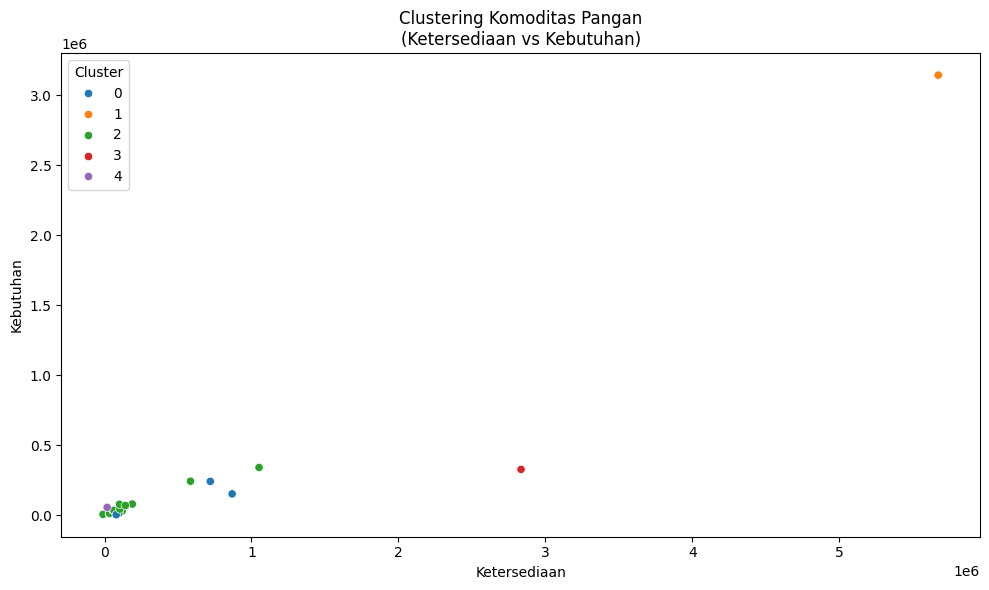

In [14]:
# visualisasi hasil clustering
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=cluster_df,
    x='ketersediaan',
    y='kebutuhan',
    hue='cluster',
    palette='tab10'
)

plt.title('Clustering Komoditas Pangan\n(Ketersediaan vs Kebutuhan)')
plt.xlabel('Ketersediaan')
plt.ylabel('Kebutuhan')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


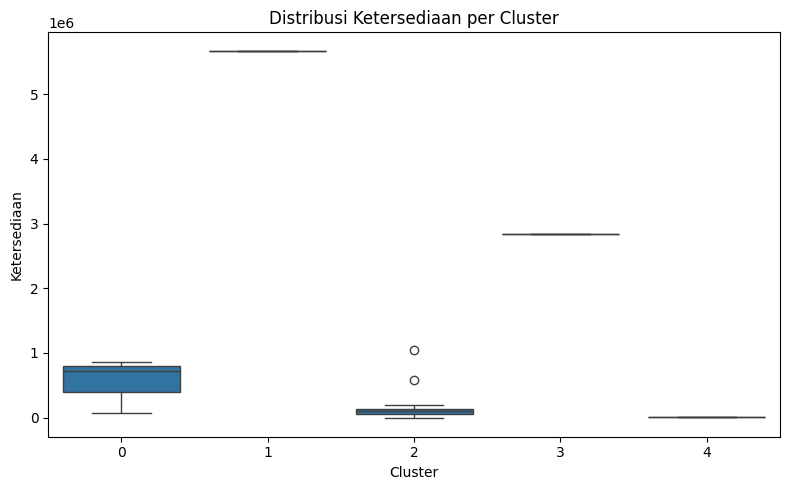

In [15]:
# visualisasi distribusi ketersediaan per cluster
plt.figure(figsize=(8,5))
sns.boxplot(
    data=cluster_df,
    x='cluster',
    y='ketersediaan'
)

plt.title('Distribusi Ketersediaan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ketersediaan')
plt.tight_layout()
plt.show()


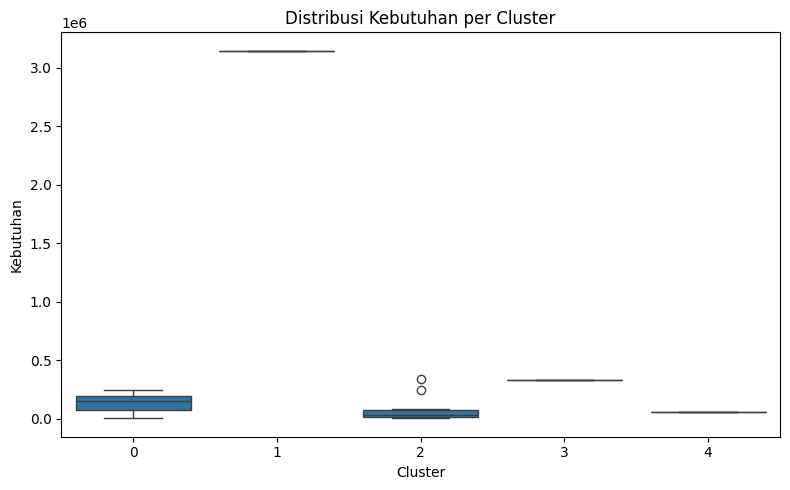

In [16]:
# visualisasi distribusi kebutuhan per cluster
plt.figure(figsize=(8,5))
sns.boxplot(
    data=cluster_df,
    x='cluster',
    y='kebutuhan'
)

plt.title('Distribusi Kebutuhan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Kebutuhan')
plt.tight_layout()
plt.show()


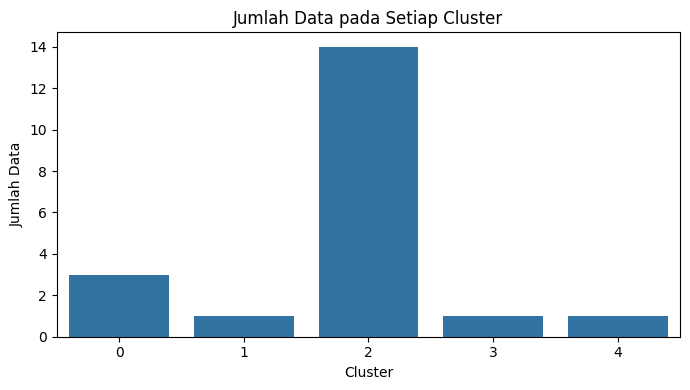

In [17]:
# visualisasi jumlah data pada setiap cluster
cluster_count = cluster_df['cluster'].value_counts().sort_index()

plt.figure(figsize=(7,4))
sns.barplot(
    x=cluster_count.index,
    y=cluster_count.values
)

plt.title('Jumlah Data pada Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.tight_layout()
plt.show()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tahun            476 non-null    int64  
 1   komoditas        476 non-null    object 
 2   bulan            476 non-null    object 
 3   ketersediaan     476 non-null    int64  
 4   kebutuhan        476 non-null    int64  
 5   deviasi          476 non-null    int64  
 6   surplus_defisit  476 non-null    int64  
 7   rasio_pangan     476 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 29.9+ KB


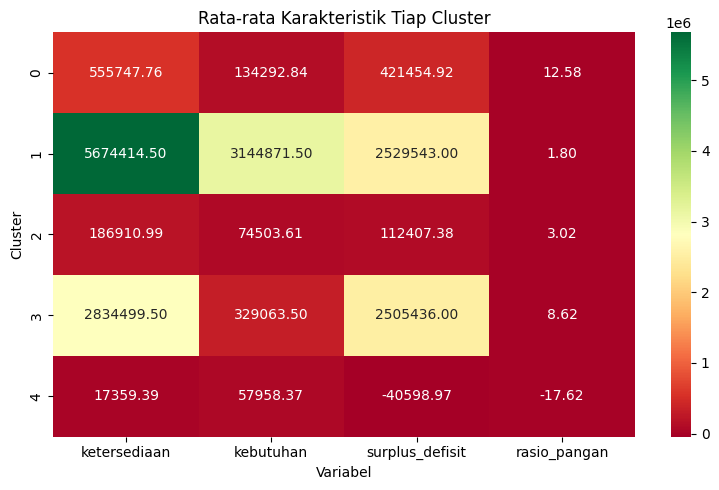

In [19]:
# visualisasi rata-rata karakteristik tiap cluster
cluster_mean = cluster_df.groupby('cluster')[[
    'ketersediaan',
    'kebutuhan',
    'surplus_defisit',
    'rasio_pangan'
]].mean()

plt.figure(figsize=(8,5))
sns.heatmap(
    cluster_mean,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)

plt.title('Rata-rata Karakteristik Tiap Cluster')
plt.ylabel('Cluster')
plt.xlabel('Variabel')
plt.tight_layout()
plt.show()
